In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


In [3]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)


In [4]:
#minmaxscaler makes the data values in the range of [0-1]
scaler = MinMaxScaler()
training_data = scaler.fit_transform(data_training)
training_data 

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [5]:
X_train = []
y_train = []
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train

array([[[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
         5.43577404e-01],
        [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
         2.77885613e-01],
        [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
         2.22150736e-01],
        ...,
        [3.05463616e-02, 2.99154223e-02, 2.87421258e-02, 2.80807737e-02,
         2.69022556e-01],
        [2.91476913e-02, 2.88240316e-02, 2.91816917e-02, 2.77373761e-02,
         2.58801264e-01],
        [2.85197221e-02, 3.33972717e-02, 2.96959051e-02, 3.39348522e-02,
         3.64400680e-01]],

       [[7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
         2.77885613e-01],
        [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
         2.22150736e-01],
        [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98678849e-03,
         1.85522018e-01],
        ...,
        [2.91476913e-02, 2.88240316e-02, 2.91816917e-02, 2.77373761e-02,
        

In [6]:
#sequential is used because we have one input and output tensor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
X_train.shape[2]

5

In [7]:

model = Sequential()

#units represent the no of cells in out lstm 
#lstm is long short term memory it has four neurons
#activation function ensures tht the non linear realtion ship holds
#relu is better than other activation function
# That return sequences return the hidden state output for each input time step.
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
#Dropout is a technique where randomly selected neurons are ignored during training it used to prevent overfitting
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

#it is connecting current layer to the previous layer
model.add(Dense(units = 1))



In [8]:
#optimizer increases the accuracy
#adam is efficient and requires less memory 
model.compile(optimizer='adam', loss = 'mean_squared_error')
#epochs how many times we are feeding our training data to the model we can't feed the whole data in one time stamp so we are feeding 
#it in batches means 60 * 32 * 5
#batch is used to take 32 rows and update it
model.fit(X_train, y_train, epochs=50, batch_size=32)

data_test.head()


Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0145
Epoch 2/50
3557/3557 [==============================] - 16s 4ms/sample - loss: 0.0022
Epoch 3/50
3557/3557 [==============================] - 16s 5ms/sample - loss: 0.0021
Epoch 4/50
3557/3557 [==============================] - 17s 5ms/sample - loss: 0.0018
Epoch 5/50
3557/3557 [==============================] - 17s 5ms/sample - loss: 0.0017
Epoch 6/50
3557/3557 [==============================] - 16s 5ms/sample - loss: 0.0017
Epoch 7/50
3557/3557 [==============================] - 15s 4ms/sample - loss: 0.0014
Epoch 8/50
3557/3557 [==============================] - 15s 4ms/sample - loss: 0.0014
Epoch 9/50
3557/3557 [==============================] - 16s 4ms/sample - loss: 0.0014
Epoch 10/50
3557/3557 [==============================] - 15s 4ms/sample - loss: 0.0012
Epoch 11/50
3557/3557 [==============================] - 16s 4ms/sample - loss: 0.0014
Epoch 12/50
3557/3557 [=======

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [9]:
data_training.tail(60)

past_60_days = data_training.tail(60)

df = past_60_days.append(data_test, ignore_index = True,sort=True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()


,Close,High,Low,Open,Volume
0,1168.189941,1197.510010,1155.576050,1195.329956,2209500
1,1157.349976,1173.500000,1145.119995,1167.500000,1184300
2,1148.969971,1168.000000,1127.364014,1150.109985,1932400
3,1138.819946,1154.349976,1137.572021,1146.150024,1308700
4,1081.219971,1132.170044,1081.130005,1131.079956,2675700


In [10]:
inputs = scaler.transform(df)
inputs

array([[0.91583916, 0.93755773, 0.92220906, 0.94009085, 0.0266752 ],
       [0.90696551, 0.91792904, 0.91350452, 0.91725155, 0.01425359],
       [0.90010559, 0.91343268, 0.89872289, 0.90298003, 0.02331778],
       ...,
       [0.92274824, 0.93712442, 0.93529076, 0.94144498, 0.01947328],
       [0.93191658, 0.93064972, 0.92791493, 0.92750996, 0.01954719],
       [0.94924648, 0.94894575, 0.95017564, 0.93726778, 0.01227612]])

In [11]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])


In [12]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape


((192, 60, 5), (192,))

In [13]:
y_pred = model.predict(X_test)
scaler.scale_
#it is making the ypred and ytest in the same scale
scale = 1/8.18605127e-04
scale


1221.5901990069017

In [14]:
y_pred = y_pred*scale
y_test = y_test*scale

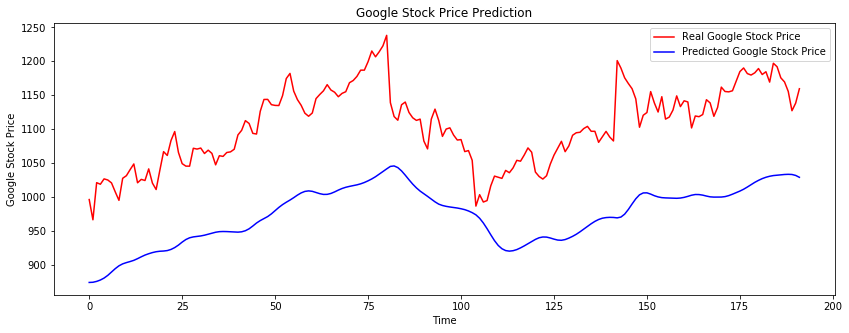

In [15]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()